In [7]:
import pandas as pd
df=pd.read_excel('output.xlsx')
df

,title,text
0,О просроченной задолженности по заработной пла...,О просроченной задолженности по заработной пла...
1,О потребительских ценах на нефтепродукты с 25 ...,О потребительских ценах на нефтепродукты с 25 ...
2,О промышленном производстве в январе-сентябре ...,О промышленном производстве в январе-сентябре ...
3,О просроченной задолженности по заработной пла...,О просроченной задолженности по заработной пла...
4,О потребительских ценах на нефтепродукты с 8 п...,О потребительских ценах на нефтепродукты с 8 п...
...,...,...
481,О финансовых результатах деятельности организа...,О финансовых результатах деятельности организа...
482,Деловая активность организаций в России в октя...,Деловая активность организаций в России в октя...
483,О потребительских ценах на нефтепродукты с 15 ...,О потребительских ценах на нефтепродукты с 15 ...
484,Об оценке индекса потребительских цен с 15 по ...,Об оценке индекса потребительских цен с 15 по ...


In [9]:
import numpy as np
total_articles = len(df)
df['title_length'] = df['title'].apply(lambda x: len(str(x)))
mean_title_len = df['title_length'].mean()
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))
mean_word_count = df['word_count'].mean()
print(f"Статей: {total_articles}")
print(f"Ср. длина заголовка: {mean_title_len:.1f} символов.")
print(f"Ср. длина текста: {mean_word_count:.1f} символов")


Статей: 486
Ср. длина заголовка: 70.1 симв.
Ср. длина текста: 1377.1 слов


In [11]:
from collections import Counter
import re

all_titles = ' '.join(df['title'].astype(str)).lower()
words = re.findall(r'\b[а-яё]{4,}\b', all_titles)
top_keywords = Counter(words).most_common(10)
top_keywords

[('года', 469),
 ('потребительских', 266),
 ('оценке', 124),
 ('индекса', 119),
 ('ценах', 118),
 ('нефтепродуктов', 77),
 ('производства', 73),
 ('объеме', 70),
 ('январе', 58),
 ('индексе', 58)]

In [12]:
df['text_length'] = df['text'].apply(len)
median_text_len = df['text_length'].median()

df['has_numbers'] = df['text'].apply(lambda x: bool(re.search(r'\d', str(x))))
percent_with_numbers = df['has_numbers'].mean() * 100

df['unique_words'] = df['text'].apply(lambda x: len(set(str(x).split())))
mean_unique_words = df['unique_words'].mean()

print(f"Медианная длина текста: {median_text_len} симв.")
print(f"Статей с цифрами: {percent_with_numbers:.1f}%")
print(f"Ср. количество уникальных слов: {mean_unique_words:.1f}")

Медианная длина текста: 8688.0 симв.
Статей с цифрами: 100.0%
Ср. количество уникальных слов: 731.5


In [14]:
df['mentions_rosstat'] = df['text'].str.contains('Росстат', case=False)
rosstat_mentions = df['mentions_rosstat'].mean() * 100
# 11. Количество предложений
df['sentences'] = df['text'].apply(lambda x: len(re.findall(r'[.!?]+', str(x))))
mean_sentences = df['sentences'].mean()
print(f"Упоминаний 'Росстат': {rosstat_mentions:.1f}%")
print(f"Ср. предложений на статью: {mean_sentences:.1f}")

Упоминаний 'Росстат': 38.9%
Ср. предложений на статью: 48.8


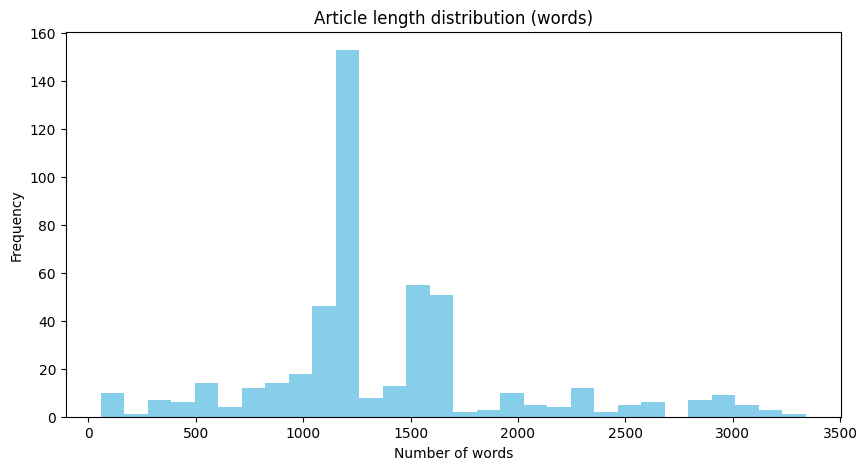

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.hist(df['word_count'], bins=30, color='skyblue')
plt.title('Article length distribution (words)')
plt.xlabel('Number of words')
plt.ylabel('Frequency')
plt.show()

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import re

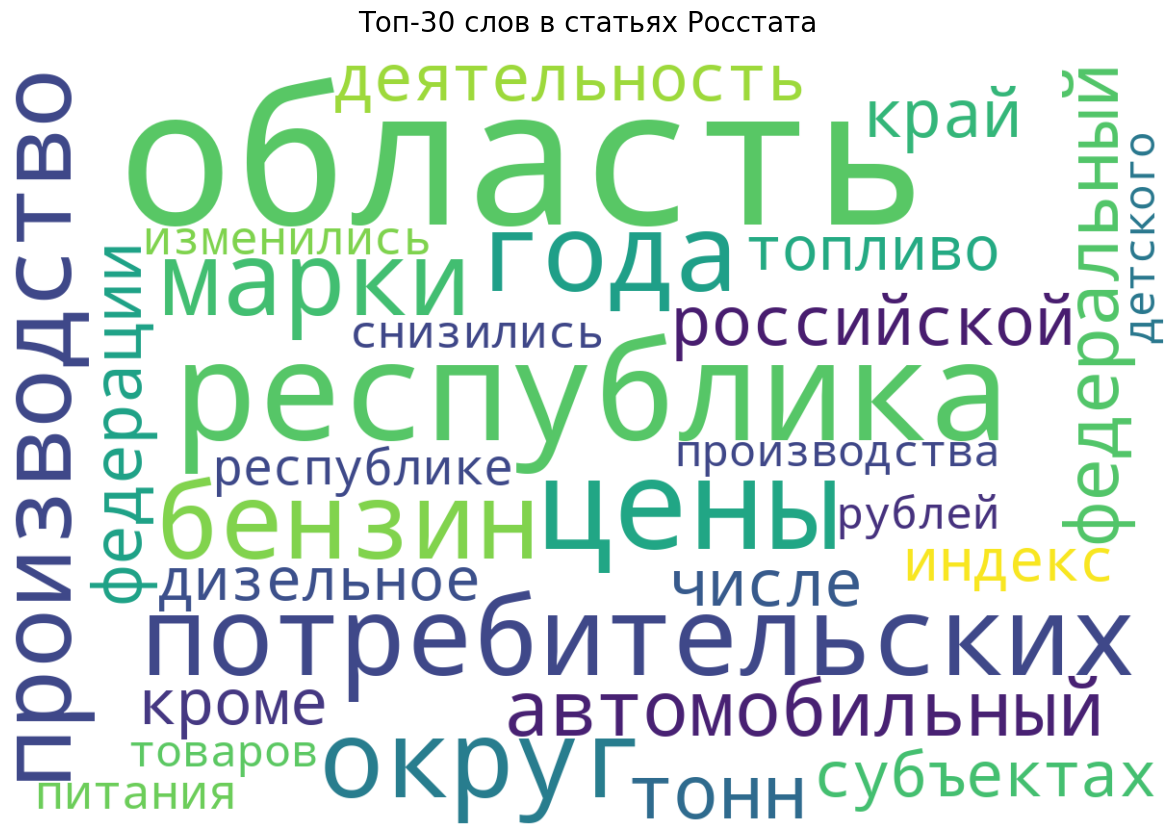

In [19]:
texts = df['text'].str.cat(sep=' ').lower()

# Очистка текста и подсчёт слов
words = re.findall(r'\b[а-яё]{4,}\b', texts)
word_freq = Counter(words).most_common(100)

# Параметры облака
wordcloud = WordCloud(
    width=1200,
    height=800,
    background_color='white',
    colormap='viridis',
    max_words=30,
    relative_scaling=0.5,
    min_font_size=10,
    max_font_size=200,
    random_state=42
).generate_from_frequencies(dict(word_freq))

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Топ-30 слов в статьях Росстата', fontsize=20, pad=20)
plt.show()